In [1]:
!ls /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/objectRel_pilot2

caption_feature_wmask  images			       partition
captions	       img_vae_features_128resolution


In [2]:
!cp -r /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/objectRel_pilot2 \
       /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/objectRel_pilot_rndemb

In [1]:
import numpy as np
from os.path import join

### Read format of encoding

In [2]:
dataset_root = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/objectRel_pilot2"
caption_dir = join(dataset_root, "captions")
image_dir = join(dataset_root, "images")
img_feat_dir = join(dataset_root, "img_vae_features_128resolution")
text_feat_dir = join(dataset_root, "caption_feature_wmask")

In [55]:
data = np.load(join(text_feat_dir, "1.npz"))
print(data["caption_feature"].shape, data["caption_feature"].dtype)
print(data["attention_mask"].shape, data["attention_mask"].dtype)

(1, 20, 4096) float32
(1, 20) int64


In [58]:
# norm of the caption feature 
np.linalg.norm(data["caption_feature"][0, :, :], axis=-1)
# np.linalg.norm(data["caption_feature"][0, -2, :])

array([6.393952 , 6.9601555, 6.032805 , 7.224179 , 5.302218 , 7.019133 ,
       2.135641 , 2.8523605, 6.6894746, 7.4309163, 2.5891466, 7.7653847,
       8.648283 , 7.3294744, 7.062304 , 7.6390076, 7.55763  , 7.0150366,
       8.2770815, 8.583632 ], dtype=float32)

In [10]:
data["caption_feature"][0, -1,:]

array([ 0.21777344,  0.13867188, -0.38867188, ...,  0.04101562,
       -0.01306152,  0.23925781], dtype=float32)

In [11]:
data["caption_feature"][0, -2,:]

array([ 0.26953125,  0.09667969, -0.34960938, ...,  0.06738281,
       -0.00445557,  0.21289062], dtype=float32)

In [60]:
embed_norms_col = []
for sample_idx in range(1000):
    data = np.load(join(text_feat_dir, f"{sample_idx}.npz"))
    embed_norms = np.linalg.norm(data["caption_feature"][0, :, :], axis=-1)
    embed_norms_col.append(embed_norms)
embed_norms_col = np.array(embed_norms_col)
print(embed_norms_col.shape)
print(embed_norms_col.mean(), embed_norms_col.std())

7.1490984 1.9315592


### Create new random word embedding 

In [21]:
dataset_root = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/objectRel_pilot_rndemb"
caption_dir = join(dataset_root, "captions")
image_dir = join(dataset_root, "images")
img_feat_dir = join(dataset_root, "img_vae_features_128resolution")
text_feat_dir = join(dataset_root, "caption_feature_wmask")

In [ ]:
# use the same toeknizer 

# tokenize caption 

# make dictionary or random embedding 

# replace the word embedding in the original encoding 


In [5]:
for i in range(100000):
    data = np.load(join(text_feat_dir, f"{i}.npz"))
    print(data["caption_feature"].shape, data["caption_feature"].dtype)
    print(data["attention_mask"].shape, data["attention_mask"].dtype)
    break


(1, 20, 4096) float32
(1, 20) int64


In [66]:
embed_dim = 4096
for i in range(100000):
    text = open(join(caption_dir, f"{i}.txt")).read()
    break
    # make a random embedding 
    caption_feature = ...
    attention_mask = ...
    np.savez(join(text_feat_dir, f"{i}.npz"), caption_feature=caption_feature, attention_mask=attention_mask)
text

' circle is to the upper left of blue triangle'

### Manual tokenization

In [9]:
corpus = []
for i in range(10000):
    text = open(join(caption_dir, f"{i}.txt")).read()
    corpus.append(text)

corpus = " ".join(corpus)
# find words in the corpus 
words = set(corpus.split(" "))
# make a dictionary 
word2idx = {word: i for i, word in enumerate(words)}
# make a random embedding 
embeddings = np.random.randn(len(words), embed_dim)

In [59]:
np.linalg.norm(embeddings, axis=-1)


array([[64.08751 , 64.876854, 63.717865, 64.10469 , 63.986126, 64.4328  ,
        64.19293 , 63.904846, 64.29773 , 63.744377, 63.744377, 63.744377,
        63.744377, 63.744377, 63.744377, 63.744377, 63.744377, 63.744377,
        63.744377, 63.744377]], dtype=float32)

### T5 tokenization + random embedding

In [3]:
import torch as th
from tqdm.notebook import tqdm, trange
from transformers import T5Tokenizer, T5EncoderModel

In [4]:
T5_path = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/output/pretrained_models/t5_ckpts/t5-v1_1-xxl"
tokenizer = T5Tokenizer.from_pretrained(T5_path, )#subfolder="tokenizer")
encoder = T5EncoderModel.from_pretrained(T5_path)

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/n/home12/binxuwang/.conda/envs/torch2/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [24]:
def tokenize_captions(caption_dir, tokenizer, num_captions=10000, model_max_length=20):
    """Tokenize captions from text files using T5 tokenizer.
    
    Args:
        caption_dir: Directory containing caption text files
        tokenizer: T5 tokenizer instance
        num_captions: Number of captions to process
        model_max_length: Max sequence length for tokenization
        
    Returns:
        input_ids_tsr: Tensor of tokenized input IDs
        attention_mask_col: List of attention masks
    """
    input_ids_col = []
    attention_mask_col = []
    
    for i in trange(num_captions):
        text = open(join(caption_dir, f"{i}.txt")).read()
        text_tokens_and_mask = tokenizer(
            text,
            max_length=model_max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            add_special_tokens=True,
            return_tensors='pt'
        )
        input_ids_col.append(text_tokens_and_mask['input_ids'])
        attention_mask_col.append(text_tokens_and_mask['attention_mask'])

    input_ids_tsr = th.cat(input_ids_col, dim=0)
    return input_ids_tsr, attention_mask_col

In [22]:
model_max_length = 20
# use T5 tokenizer 
corpus = []
input_ids_col = []
attention_mask_col = []
for i in trange(10000):
    text = open(join(caption_dir, f"{i}.txt")).read()
    text_tokens_and_mask = tokenizer(
        text,
        max_length=model_max_length,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        add_special_tokens=True,
        return_tensors='pt'
    )
    input_ids_col.append(text_tokens_and_mask['input_ids'])
    attention_mask_col.append(text_tokens_and_mask['attention_mask'])
    # break
    # corpus.append(text)

input_ids_tsr = th.cat(input_ids_col, dim=0)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [69]:
# find unique input ids 
unique_input_ids, unique_indices = th.unique(input_ids_tsr, return_inverse=True)
# create random word embeddings
embedding_dict = th.randn(len(unique_input_ids), embed_dim, 
                          generator=th.Generator().manual_seed(42)) \
                            / np.sqrt(embed_dim) * 7.5
input_ids2dict_ids = {idx.item(): id for id, idx in enumerate(unique_input_ids)}
dict_ids2input_ids = {id: idx.item() for id, idx in enumerate(unique_input_ids)}
# check if the unique input ids are the same as the input ids 
print(input_ids_tsr[0])
print(unique_input_ids[unique_indices[0]])
assert (input_ids_tsr == unique_input_ids[unique_indices]).all()
th.save({"unique_input_ids": unique_input_ids, 
         "embedding_dict": embedding_dict,
         "input_ids2dict_ids": input_ids2dict_ids, 
         "dict_ids2input_ids": dict_ids2input_ids}, 
         join(text_feat_dir, "word_embedding_dict.pt"))

tensor([ 8196,    19,    12,     8,  4548,   646,    13,  1692, 19938,     1,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])
tensor([ 8196,    19,    12,     8,  4548,   646,    13,  1692, 19938,     1,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])


In [70]:
text_feat_dir

'/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/objectRel_pilot_rndemb/caption_feature_wmask'

In [62]:
# print out the meaning of the unique input ids 
for i, ids in enumerate(unique_input_ids):
    print(i, ids.item(), tokenizer.decode(ids))

0 0 <pad>
1 1 </s>
2 8 the
3 11 and
4 12 to
5 13 of
6 19 is
7 45 from
8 95 up
9 120 ly
10 145 than
11 269 right
12 323 down
13 646 left
14 666 below
15 756 above
16 1131 red
17 1146 higher
18 1364 lower
19 1461 directly
20 1692 blue
21 2812 square
22 4548 upper
23 8196 circle
24 19938 triangle
25 26184 diagonal


In [63]:
# Example of encoding a sequence using unique_input_ids as dictionary
sequence = [8196, 19, 12]  # Example sequence to encode
indices = [input_ids2dict_ids[id] for id in sequence]
print(f"Original sequence: {sequence}")
print(f"Encoded indices: {indices}")

Original sequence: [8196, 19, 12]
Encoded indices: [23, 6, 4]


In [72]:
# map the input_ids to the word embeddings 
for sample_idx in trange(10000):
    input_ids = input_ids_col[sample_idx]
    embeddings = embedding_dict[unique_indices[sample_idx]]
    embeddings = embeddings.unsqueeze(0)
    if sample_idx % 1000 == 0:
        # check if the embeddings shpae and date type are the same as the original ones 
        data = np.load(join(text_feat_dir, f"{sample_idx}.npz"))
        assert (data["caption_feature"].shape == embeddings.numpy().shape)
        assert(data["caption_feature"].dtype == embeddings.numpy().dtype)
        assert (data["attention_mask"] == attention_mask_col[sample_idx].numpy()).all()
        assert(data["attention_mask"].dtype == attention_mask_col[sample_idx].numpy().dtype)

    np.savez(join(text_feat_dir, f"{sample_idx}.npz"), caption_feature=embeddings.numpy(), attention_mask=attention_mask_col[sample_idx].numpy())

  0%|          | 0/10000 [00:00<?, ?it/s]

In [71]:
text_feat_dir

'/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/objectRel_pilot_rndemb/caption_feature_wmask'

In [47]:
text_feat_dir

'/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/objectRel_pilot_rndemb/caption_feature_wmask'

In [58]:
import os
import torch
@torch.no_grad()
def save_prompt_embeddings_randemb(tokenizer, text_encoder, validation_prompts, prompt_cache_dir="output/tmp/prompt_cache", 
                           device="cuda", max_length=20, t5_path=None, recompute=False):
    """Save T5 text embeddings for a list of prompts to cache directory.
    
    Args:
        validation_prompts (list): List of text prompts to encode
        prompt_cache_dir (str): Directory to save embeddings
        device (str): Device to run encoding on
        max_length (int): Max sequence length for tokenization
        t5_path (str): Path to T5 model. If None, uses default path
    """
    if t5_path is None:
        t5_path = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/output/pretrained_models/t5_ckpts/t5-v1_1-xxl"
    
    result_col = []
    os.makedirs(prompt_cache_dir, exist_ok=True)
    # Load models
    print(f"Loading text encoder and tokenizer from {t5_path} ...")
    # tokenizer = T5Tokenizer.from_pretrained(t5_path)
    # text_encoder = T5EncoderModel.from_pretrained(t5_path).to(device)
    text_encoder = text_encoder.to(device)
    # Save unconditioned embedding
    uncond = tokenizer("", max_length=max_length, padding="max_length", truncation=True, return_tensors="pt").to(device)
    uncond_prompt_embeds = text_encoder(uncond.input_ids, attention_mask=uncond.attention_mask)[0]
    torch.save({'caption_embeds': uncond_prompt_embeds, 'emb_mask': uncond.attention_mask, 'prompt': ''}, 
               join(prompt_cache_dir,f'uncond_{max_length}token.pth'))
    result_col.append({'prompt': '', 'caption_embeds': uncond_prompt_embeds, 'emb_mask': uncond.attention_mask})
    print("Preparing Visualization prompt embeddings...")
    print(f"Saving visualizate prompt text embedding at {prompt_cache_dir}")
    for prompt in validation_prompts:
        if os.path.exists(join(prompt_cache_dir,f'{prompt}_{max_length}token.pth')) and not recompute:
            result_col.append(torch.load(join(prompt_cache_dir,f'{prompt}_{max_length}token.pth')))
            continue
        print(f"Mapping {prompt}...")
        caption_token = tokenizer(prompt, max_length=max_length, padding="max_length", truncation=True, return_tensors="pt").to(device)
        caption_emb = text_encoder(caption_token.input_ids, attention_mask=caption_token.attention_mask)[0]
        torch.save({'caption_embeds': caption_emb, 'emb_mask': caption_token.attention_mask, 'prompt': prompt}, 
                    join(prompt_cache_dir,f'{prompt}_{max_length}token.pth'))
        result_col.append({'prompt': prompt, 'caption_embeds': caption_emb, 'emb_mask': caption_token.attention_mask})
    print("Done!")
    # garbage collection
    del tokenizer, text_encoder
    torch.cuda.empty_cache()
    return result_col


In [108]:
import torch.nn as nn
# Create text encoder class
class RandomEmbeddingEncoder(nn.Module):
    def __init__(self, embedding_dict=None, input_ids2dict_ids=None, dict_ids2input_ids=None):
        super().__init__()
        if embedding_dict is None:
            self.embedding_dict = th.load(join(text_feat_dir, "word_embedding_dict.pt"))["embedding_dict"]
            self.input_ids2dict_ids = th.load(join(text_feat_dir, "word_embedding_dict.pt"))["input_ids2dict_ids"]
            self.dict_ids2input_ids = th.load(join(text_feat_dir, "word_embedding_dict.pt"))["dict_ids2input_ids"]
        else:
            self.embedding_dict = embedding_dict
            self.input_ids2dict_ids = input_ids2dict_ids
            self.dict_ids2input_ids = dict_ids2input_ids
        
    def __call__(self, input_ids, attention_mask=None):
        return self.encode(input_ids, attention_mask)
    
    def encode(self, input_ids, attention_mask=None):
        """Convert input ids to embeddings"""
        if isinstance(input_ids, list):
            input_ids = th.tensor(input_ids)
        # map the input_ids to dict ids 
        indices = th.tensor([self.input_ids2dict_ids[id.item()] for id in input_ids.reshape(-1)]).reshape(input_ids.shape)
        # indices = th.tensor([self.input_ids2dict_ids[id.item()] for id in input_ids])
        embeddings = self.embedding_dict[indices]
        return embeddings, attention_mask
    
    def to(self, device):
        self.embedding_dict = self.embedding_dict.to(device)
        # self.input_ids2dict_ids = self.input_ids2dict_ids.to(device)
        # self.dict_ids2input_ids = self.dict_ids2input_ids.to(device)
        return self

text_encoder = RandomEmbeddingEncoder().to("cuda")
# print(text_encoder.encode(input_ids_tsr[0:1]))
text_emb = text_encoder(input_ids_tsr[0:1])[0]
load_emb = np.load(join(text_feat_dir, f"0.npz"))["caption_feature"]
# print(np.load(join(text_feat_dir, f"0.npz"))["caption_feature"])
assert th.allclose(text_emb.cpu(), th.tensor(load_emb))


In [109]:
# visualize prompts 
visualize_prompts = [
    "triangle is to the upper left of square", 
    "blue triangle is to the upper left of red square", 
    "triangle is above and to the right of square", 
    "blue circle is above and to the right of blue square", 
    "triangle is to the left of square", 
    "triangle is to the left of triangle", 
    "circle is below red square",
    "red circle is to the left of blue square",
    "blue square is to the right of red circle",
    "red circle is above square",
    "triangle is above red circle",
]
prompt_cache_dir = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/output/prompt_cache_rndemb"
tokenizer = T5Tokenizer.from_pretrained(T5_path)
rnd_encoding = th.load(join(text_feat_dir, "word_embedding_dict.pt"))
rnd_text_encoder = RandomEmbeddingEncoder(rnd_encoding["embedding_dict"], rnd_encoding["input_ids2dict_ids"], rnd_encoding["dict_ids2input_ids"])
caption_embeddings = save_prompt_embeddings_randemb(tokenizer, rnd_text_encoder, 
    visualize_prompts, prompt_cache_dir, device="cuda", max_length=20, t5_path=T5_path, recompute=True)
for i, embedding in enumerate(caption_embeddings):
    print(f"{i}: {embedding['prompt']} | token num:{embedding['emb_mask'].sum()}")
torch.save(caption_embeddings, join(prompt_cache_dir, "caption_embeddings_list.pth"))

Loading text encoder and tokenizer from /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/output/pretrained_models/t5_ckpts/t5-v1_1-xxl ...
Preparing Visualization prompt embeddings...
Saving visualizate prompt text embedding at /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/output/prompt_cache_rndemb
Mapping triangle is to the upper left of square...
Mapping blue triangle is to the upper left of red square...
Mapping triangle is above and to the right of square...
Mapping blue circle is above and to the right of blue square...
Mapping triangle is to the left of square...
Mapping triangle is to the left of triangle...
Mapping circle is below red square...
Mapping red circle is to the left of blue square...
Mapping blue square is to the right of red circle...
Mapping red circle is above square...
Mapping triangle is above red circle...
Done!
0:  | token num:1
1: triangle is to the upper left of square | token num:9
2: blue trian

/n/home12/binxuwang/.conda/envs/torch2/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [105]:
prompt_cache_dir1 = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/output/prompt_cache"
caption_embeddings = torch.load(join(prompt_cache_dir1, "caption_embeddings_list.pth"))
# for i, embedding in enumerate(caption_embeddings):
#     print(f"{i}: {embedding['prompt']} | token num:{embedding['emb_mask'].sum()}")

In [107]:
caption_embeddings[0]['caption_embeds'].shape


torch.Size([1, 20, 4096])

### T5 tokenization + random embedding + pos encoding

In [5]:
import torch
import torch as th
from tqdm.notebook import tqdm, trange
from transformers import T5Tokenizer, T5EncoderModel

In [6]:
T5_path = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/output/pretrained_models/t5_ckpts/t5-v1_1-xxl"
tokenizer = T5Tokenizer.from_pretrained(T5_path, )#subfolder="tokenizer")
encoder = T5EncoderModel.from_pretrained(T5_path)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [11]:
def get_positional_encodings(seq_len, d_model, device='cpu'):
    """
    Generate positional encodings for a sequence.

    Args:
        seq_len (int): Length of the sequence.
        d_model (int): Dimension of the model (embedding size).
        device (str): Device to place the tensor on ('cpu' or 'cuda').

    Returns:
        torch.Tensor: Positional encodings of shape (seq_len, d_model).
    """
    position = th.arange(seq_len, dtype=th.float, device=device).unsqueeze(1)
    div_term = th.exp(th.arange(0, d_model, 2, dtype=th.float, device=device) *
                         -(th.log(th.tensor(10000.0)) / d_model))
    wpe = th.zeros(seq_len, d_model, device=device)
    wpe[:, 0::2] = th.sin(position * div_term)
    wpe[:, 1::2] = th.cos(position * div_term)
    return wpe


get_positional_encodings(20, 4096, "cpu").shape

torch.Size([20, 4096])

In [49]:
import torch.nn as nn
# Create text encoder class
class RandomEmbeddingEncoder_wPosEmb(nn.Module):
    def __init__(self, embedding_dict=None, input_ids2dict_ids=None, dict_ids2input_ids=None, max_seq_len=20, embed_dim=4096, wpe_scale=1):
        super().__init__()
        if embedding_dict is None:
            self.embedding_dict = th.load(join(text_feat_dir, "word_embedding_dict.pt"))["embedding_dict"]
            self.input_ids2dict_ids = th.load(join(text_feat_dir, "word_embedding_dict.pt"))["input_ids2dict_ids"]
            self.dict_ids2input_ids = th.load(join(text_feat_dir, "word_embedding_dict.pt"))["dict_ids2input_ids"]
        else:
            self.embedding_dict = embedding_dict
            self.input_ids2dict_ids = input_ids2dict_ids
            self.dict_ids2input_ids = dict_ids2input_ids
        self.max_seq_len = max_seq_len
        self.embed_dim = embed_dim
        self.wpe = get_positional_encodings(self.max_seq_len, self.embed_dim, device="cuda") * wpe_scale
        assert self.wpe.shape == (self.max_seq_len, self.embed_dim)
        assert self.embed_dim == self.embedding_dict.shape[1]
        
    def __call__(self, input_ids, attention_mask=None):
        return self.encode(input_ids, attention_mask)
    
    def encode(self, input_ids, attention_mask=None):
        """Convert input ids to embeddings"""
        if isinstance(input_ids, list):
            input_ids = th.tensor(input_ids)
        # map the input_ids to dict ids 
        indices = th.tensor([self.input_ids2dict_ids[id.item()] for id in input_ids.reshape(-1)]).reshape(input_ids.shape)
        # indices = th.tensor([self.input_ids2dict_ids[id.item()] for id in input_ids])
        embeddings = self.embedding_dict[indices]
        # add positional encoding 
        embeddings = embeddings + self.wpe[:embeddings.shape[1], :]
        return embeddings, attention_mask
    
    def to(self, device):
        self.embedding_dict = self.embedding_dict.to(device)
        self.wpe = self.wpe.to(device)
        # self.input_ids2dict_ids = self.input_ids2dict_ids.to(device)
        # self.dict_ids2input_ids = self.dict_ids2input_ids.to(device)
        return self


In [42]:
dataset_root = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/objectRel_pilot_rndembposemb"
caption_dir = join(dataset_root, "captions")
image_dir = join(dataset_root, "images")
img_feat_dir = join(dataset_root, "img_vae_features_128resolution")
text_feat_dir = join(dataset_root, "caption_feature_wmask")

In [50]:
text_feat_dir_old = '/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/objectRel_pilot_rndemb/caption_feature_wmask'
emb_data = th.load(join(text_feat_dir_old, "word_embedding_dict.pt"))
rndpos_encoder = RandomEmbeddingEncoder_wPosEmb(emb_data["embedding_dict"], 
                                              emb_data["input_ids2dict_ids"], 
                                              emb_data["dict_ids2input_ids"], 
                                              max_seq_len=20, embed_dim=4096,
                                              wpe_scale=1/6).to("cuda")

In [25]:
input_ids_tsr, attention_mask_col = tokenize_captions(caption_dir, tokenizer, num_captions=10000, model_max_length=20)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [56]:
text_feat_dir

'/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/objectRel_pilot_rndembposemb/caption_feature_wmask'

In [55]:
for sample_idx in trange(10000):
    input_ids = input_ids_col[sample_idx]
    embeddings = rndpos_encoder(input_ids)[0].cpu()
    np.savez(join(text_feat_dir, f"{sample_idx}.npz"), caption_feature=embeddings.numpy(), attention_mask=attention_mask_col[sample_idx].numpy())

  0%|          | 0/10000 [00:00<?, ?it/s]

In [47]:
(rndpos_encoder.wpe / 6).norm(dim=-1)

tensor([7.5425, 7.5425, 7.5425, 7.5425, 7.5425, 7.5425, 7.5425, 7.5425, 7.5425,
        7.5425, 7.5425, 7.5425, 7.5425, 7.5425, 7.5425, 7.5425, 7.5425, 7.5425,
        7.5425, 7.5425], device='cuda:0')

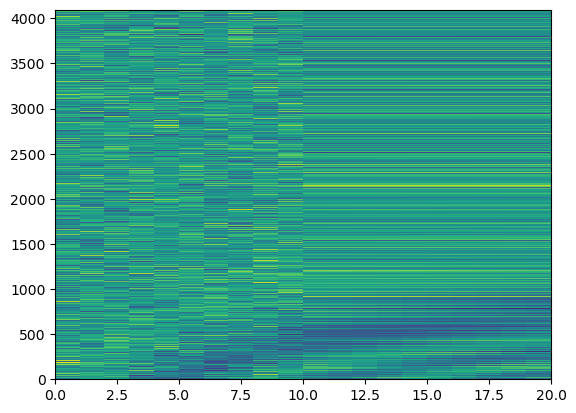

In [52]:
import matplotlib.pyplot as plt
plt.pcolor(embeddings[0][0].cpu().numpy().T)


In [60]:
# visualize prompts 
visualize_prompts = [
    "triangle is to the upper left of square", 
    "blue triangle is to the upper left of red square", 
    "triangle is above and to the right of square", 
    "blue circle is above and to the right of blue square", 
    "triangle is to the left of square", 
    "triangle is to the left of triangle", 
    "circle is below red square",
    "red circle is to the left of blue square",
    "blue square is to the right of red circle",
    "red circle is above square",
    "triangle is above red circle",
    "red is above blue",
    "red is to the left of red",
    "blue triangle is above red triangle", 
    "blue circle is above blue square", 
]
prompt_cache_dir = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/output/objectRel_pilot_rndembposemb"
tokenizer = T5Tokenizer.from_pretrained(T5_path)
rnd_encoding = th.load(join(text_feat_dir, "word_embedding_dict.pt"))
rndpos_encoder = RandomEmbeddingEncoder_wPosEmb(rnd_encoding["embedding_dict"], 
                                              rnd_encoding["input_ids2dict_ids"], 
                                              rnd_encoding["dict_ids2input_ids"], 
                                              max_seq_len=20, embed_dim=4096,
                                              wpe_scale=1/6).to("cuda")
caption_embeddings = save_prompt_embeddings_randemb(tokenizer, rndpos_encoder, 
    visualize_prompts, prompt_cache_dir, device="cuda", max_length=20, t5_path=T5_path, recompute=True)
for i, embedding in enumerate(caption_embeddings):
    print(f"{i}: {embedding['prompt']} | token num:{embedding['emb_mask'].sum()}")
torch.save(caption_embeddings, join(prompt_cache_dir, "caption_embeddings_list.pth"))

Loading text encoder and tokenizer from /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/output/pretrained_models/t5_ckpts/t5-v1_1-xxl ...
Preparing Visualization prompt embeddings...
Saving visualizate prompt text embedding at /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/output/objectRel_pilot_rndembposemb
Mapping triangle is to the upper left of square...
Mapping blue triangle is to the upper left of red square...
Mapping triangle is above and to the right of square...
Mapping blue circle is above and to the right of blue square...
Mapping triangle is to the left of square...
Mapping triangle is to the left of triangle...
Mapping circle is below red square...
Mapping red circle is to the left of blue square...
Mapping blue square is to the right of red circle...
Mapping red circle is above square...
Mapping triangle is above red circle...
Mapping red is above blue...
Mapping red is to the left of red...
Mapping blue triang

### T5 architecture

### Pure T5 word vector embedding

In [9]:
encoder

T5EncoderModel(
  (shared): Embedding(32128, 4096)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 4096)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=4096, out_features=4096, bias=False)
              (k): Linear(in_features=4096, out_features=4096, bias=False)
              (v): Linear(in_features=4096, out_features=4096, bias=False)
              (o): Linear(in_features=4096, out_features=4096, bias=False)
              (relative_attention_bias): Embedding(32, 64)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseGatedActDense(
              (wi_0): Linear(in_features=4096, out_features=10240, bias=False)
              (wi_1): Linear(in_features=4096, out_features=10240, bias=False)
              (wo